<a href="https://colab.research.google.com/github/IlarjaL/CIS9655/blob/trial/World_Happiness_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # Content
# * [Part 1: overall ranking, what are the most happy countries, what are least happy countries - Hillary](#Part-1:-Load-Data)
# * [Part 2: geography: where are most/least happy countries located, are they in clusters or spread, are they warmer or colder? - Hillary](#Part-2:-Tokenizing-and-Stemming)
# * [Part 3: financially? Are they rich or poor? ](#Part-3:-TF-IDF)
# * [Part 4: social? Crime rate? Gender equality? Social equality? Social benefit (we will need additional dataset for this part) Yooeun ](#Part-4:-K-means-clustering)
# * [Part 5: changes, we can compare 2019 to 2015 and analyze if there are any major changes of the ranking Summer ](#Part-5:-Topic-Modeling---Latent-Dirichlet-Allocation)
# * [Part 6: our conclusion, what make ppl from a country happy Summer  ](#Part-5:-Topic-Modeling---Latent-Dirichlet-Allocation)


# New Section

In [ ]:
# Part 1: Load Data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
happy_df = pd.read_csv('2019.csv', index_col=False)
happy_df.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [ ]:
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
#Changing the "Overall Rank" type to string to ensure python does not conduct calculations on this column
happy_df["Overall rank"] = happy_df["Overall rank"].map(str)

In [ ]:
#Confirming changes
happy_df.dtypes

Overall rank                     object
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [ ]:
happy_df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [ ]:
happy_df_columns = ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

In [ ]:
happy_df = happy_df[happy_df_columns].copy()

In [ ]:
#Renaming the columns for easier analysis and creating a new df to not affect the original
df = happy_df.rename({'Overall rank': 'rank', 'Country or region':'country', 'Score':'score', 'GDP per capita':'gdp_per_capita',
       'Social support':'social_support', 'Healthy life expectancy':'healthy_life_expectancy',
       'Freedom to make life choices':'freedom_to_choose', 'Generosity':'generosity',
       'Perceptions of corruption':'perception_of_corruption'}, axis=1)

In [ ]:
df.head(10) 

,rank,country,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_choose,generosity,perception_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


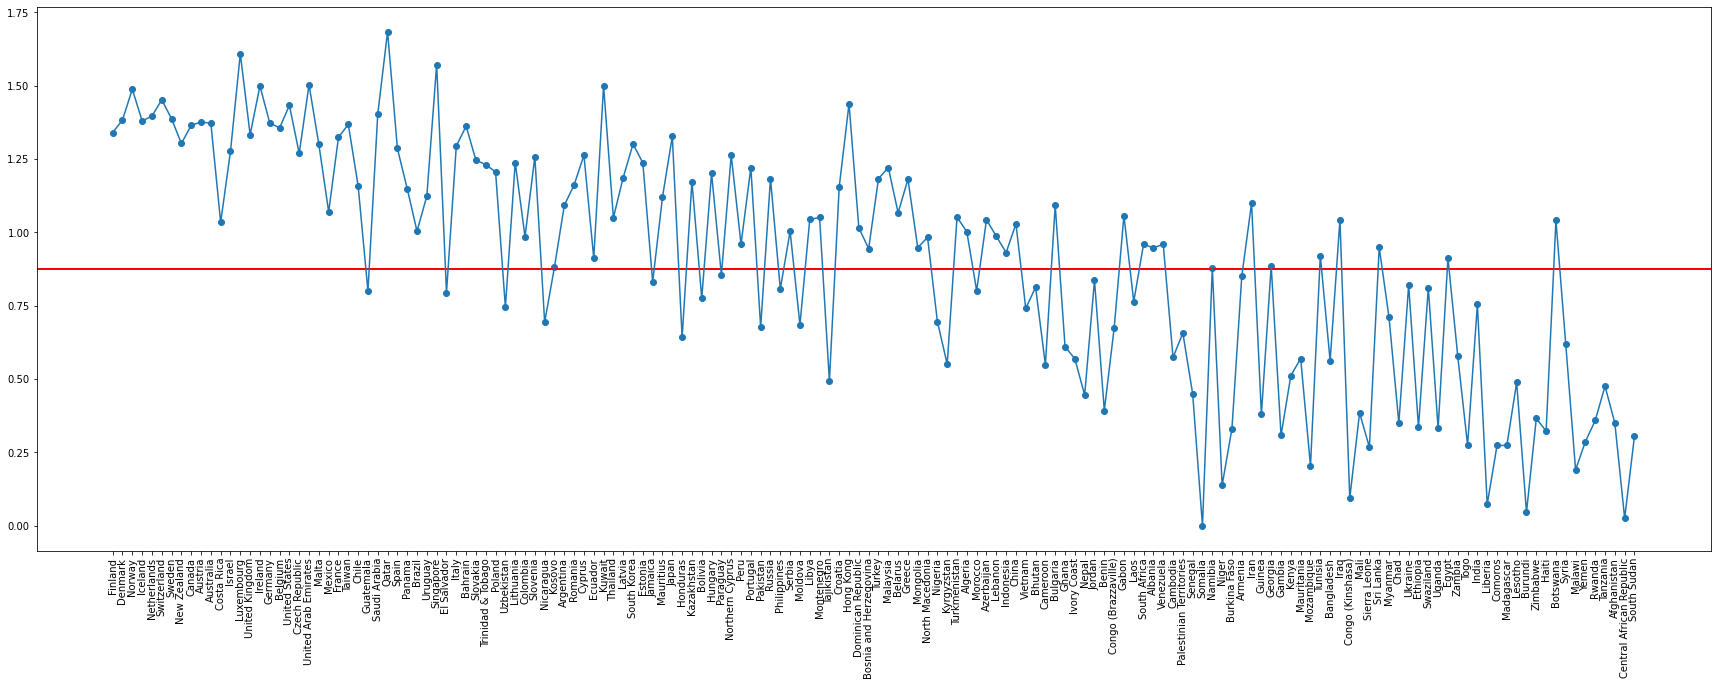

In [ ]:
# * [Part 3: financially? Are they rich or poor? ]                   ? (#Part-3:-TF-IDF) ?

x = df.country                # set x-axis
y = df.gdp_per_capita         # set y-axis

plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
plt.axhline(y=0.875, color='r', linewidth=2)
plt.scatter(x, y)
plt.plot(x, y)

In [ ]:
import json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Uploading geojson file to create maps with statistical information
path = '/content/drive/MyDrive/countries.geojson'
states = json.load(open(path, 'r'))

In [ ]:
#Creating a mapping for the states in between the source file and the geojson
state_id_map = {}
for feature in states['features']:
  feature['id'] = feature['properties']['ISO_A3']
  state_id_map[feature['properties']['ADMIN']] = feature['id']

In [ ]:
states['features'][1]['properties']

{'ADMIN': 'Afghanistan', 'ISO_A3': 'AFG'}

In [ ]:
df.head()

NameError: ignored

In [ ]:
#Replacing namin conventions for some states to overcome differences between the two data sources
df['country'].replace(['United States', 'Trinidad & Tobago', 'Serbia', 'Hong Kong', 'North Macedonia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Palestinian Territories', 'Tanzania'], 
                      ['United States of America', 'Trinidad and Tobago', 'Republic of Serbia', 'Hong Kong S.A.R.', 'Macedonia', 'Democratic Republic of the Congo', 'Republic of Congo', 'Palestine', 'United Republic of Tanzania'], inplace=True)

In [ ]:
#Creating new id column
df['id'] = df['country'].apply(lambda x: state_id_map[x])

In [ ]:
df.head()

In [ ]:
import plotly.express as px

In [ ]:
#Mapping out the happiness score
fig = px.choropleth(df, locations ='id', geojson = states, color='score')
fig.show()

In [ ]:
top10 = df.head(10)

In [ ]:
fig = px.choropleth_mapbox(top10, locations ='id', geojson = states, color='score', mapbox_style='open-street-map', zoom=1, opacity=0.5, height = 700, width=1300)
fig.show()

In [ ]:
#Plotting correlation between happiness and GDP

plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot of correlation of Happiness Score and GDP')
sns.scatterplot(x = df.head(10).score, y = df.gdp_per_capita, hue = df.head(10).country, s = 200, markers=True);

plt.legend(loc = 'upper left', fontsize = '10')
plt.xlabel('Happiness Score') 
plt.ylabel('GDP per capita')


Part 3

In [ ]:
from plotnine import ggplot, aes, geom_line
df_19 = pd.read_csv('2019.csv', index_col=False)
df_15 = pd.read_csv('2015.csv', index_col=False)
df_19 = df_19.rename(columns={df_19.columns[0]: 'Rank_2019',df_19.columns[1]: 'Country', })
df_19 = df_19[['Country','Rank_2019']]
df_19.head(5)

,Country,Rank_2019
0,Finland,1
1,Denmark,2
2,Norway,3
3,Iceland,4
4,Netherlands,5


In [ ]:
df_15 = df_15.rename(columns={df_15.columns[2]: 'Rank_2015' })
df_15 = df_15[['Country','Rank_2015']]
df_15.head(5)

,Country,Rank_2015
0,Switzerland,1
1,Iceland,2
2,Denmark,3
3,Norway,4
4,Canada,5


In [ ]:
df = pd.merge(df_19, df_15, how="inner", on='Country')
ranking = df.head(15)

,Country,Rank_2019,Rank_2015
0,Finland,1,6
1,Denmark,2,3
2,Norway,3,4
3,Iceland,4,2
4,Netherlands,5,7
5,Switzerland,6,1
6,Sweden,7,8
7,New Zealand,8,9
8,Canada,9,5
9,Austria,10,13


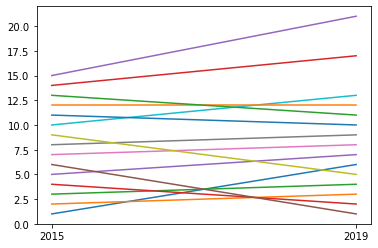

<Figure size 2160x2160 with 0 Axes>

In [ ]:
x = ["2015", "2019"]
fig, ax = plt.subplots()


for (idx, row) in ranking.iterrows():
  ax.plot(x, [row[1], row[2]])
  
  
plt.figure(figsize=(30, 30))
plt.show()
